In [69]:
import pandas as pd
import wandb
api = wandb.Api()

runs = api.runs("schooling-rl/schooling-rl")

final_df = pd.DataFrame({})
for run in runs:
    config = {k: v for k,v in run.config.items() if not k.startswith('_')}
    if run.name == 'benchamrks(6)' and config['skills_quantity'] == 5:
        history = run.history()
        history=history[['episodes' , 'avg_batch_mean_proficiency']]
        history['model']=config['model']
        final_df = pd.concat([final_df, history])

final_df.to_csv("history/lineplot.csv")

/home/kamil/anaconda3/envs/Schooling-RL/lib/python3.9/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.8666666666666667, 0.5176470588235295, 0.3215686274509804)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


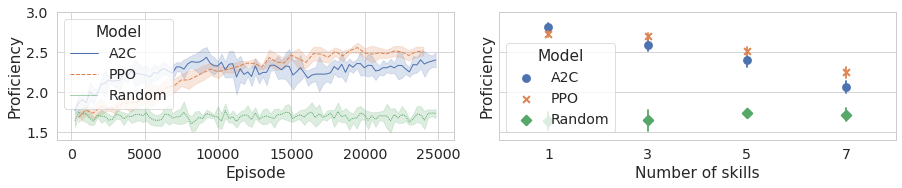

In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="whitegrid")
sns.set_context("paper",font_scale=1.6, rc={"lines.linewidth": 1})

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches(6.4 * 2, 4.8 * 0.6)

df_lineplot = pd.read_csv("history/lineplot.csv")
df_lineplot.columns = ['Index', 'Episode', 'Proficiency', 'Model']
df_lineplot['Model'] = df_lineplot['Model'].replace({"random":"Random","ppo":"PPO","a2c":"A2C"})
sns.lineplot(
    data=df_lineplot,
    x='Episode',
    y='Proficiency',
    hue='Model',
    style='Model',
    ax=ax[0],
    ci='sd'
)

scatter_df = pd.read_csv("history/scatter.csv")
scatter_df.loc[scatter_df["model"] == "ppo", "model"] = "PPO"
scatter_df.loc[scatter_df["model"] == "random", "model"] = "Random"
scatter_df.loc[scatter_df["model"] == "a2c", "model"] = "A2C"
scatter_df.head()
scatter_df.columns = ["Name", "Number of skills", "Proficiency", "Model", "_wandb"]
sns.pointplot(
    data=scatter_df,
    x="Number of skills",
    y="Proficiency",
    hue="Model",
    markers=["o", "x", "D"],
    style="Model",
    ax=ax[1],
    hue_order=["A2C", "PPO", "Random"],
    join=False,
    ci="sd",
    capsize=0,
    scale=1.5,
)
ax[1].legend(loc='lower left', title='Model')
# ax[1].legend(loc='upper right', title='Model')
# ax[1].legend(title='Model')


plt.ylim((1.4, 3))
plt.tight_layout()
plt.savefig('plot.svg', dpi=300)